In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def init(q1, q2, dx, jmax, sp = 0.5):
  x = np.linspace(0, dx * (jmax-1), jmax)
  q = np.array([(float(q1) if i < sp * jmax else float(q2)) for i in range(jmax)])
  return (x, q)

In [7]:
def do_computing(x, q, c, dt, dx, nmax, ff, order = 1, interval = 2):
  plt.figure(figsize=(7,7), dpi=100)
  plt.rcParams["font.size"] = 22

  plt.plot(x, q, marker='o', lw=2, label='n=0')

  jmax = len(x)
  flux = np.zeros(jmax)
  for n in range(1, nmax + 1):
    qold = q.copy()

    for j in range(0, jmax - 1):
      flux[j] = ff(qold, c, dt, dx, j)

    for j in range(order, jmax - order):
      q[j] = qold[j] - dt / dx * (flux[j] - flux[j-1])

    if n % interval == 0:
      plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

  plt.grid(color='black', linestyle='dashed', linewidth=0.5)
  plt.xlabel('x')
  plt.ylabel('q')
  plt.legend()
  plt.show()

In [8]:
def UPWIND1(q, c, dt, dx, j):
  ur = q[j + 1]
  ul = q[j]
  fr = c * ur
  fl = c * ul
  return 0.5 * (fr + fl - abs(c) * (ur - ul))

In [9]:
c = 1
dx = 0.1
dt = 0.05

jmax = 21
nmax = 20

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax, sp=0.05)

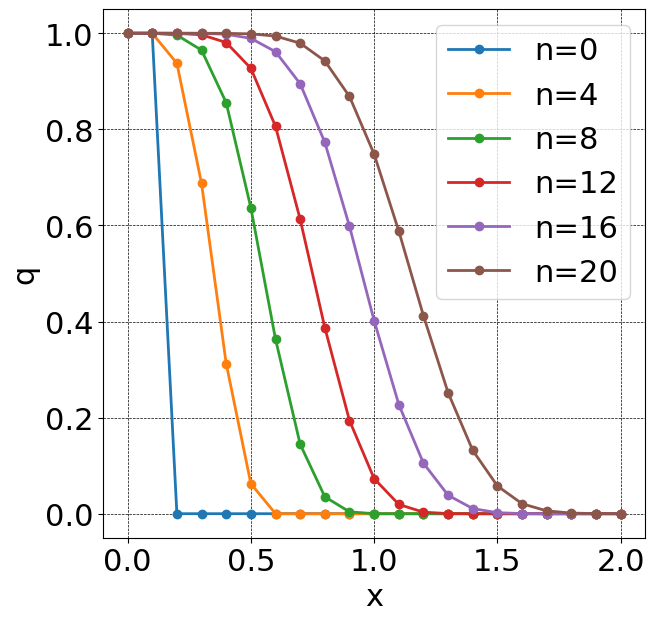

In [10]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order=1, interval=4)

In [11]:
c = -1
dx = 0.1
dt = 0.05

jmax = 21
nmax = 10

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

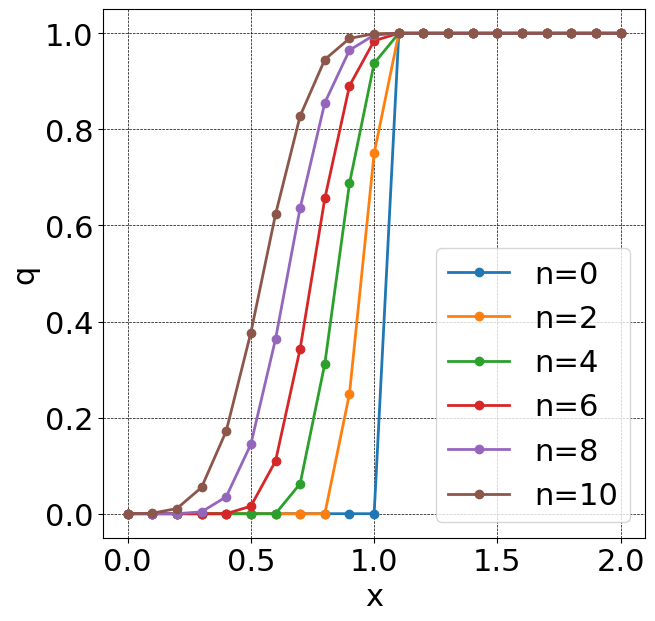

In [12]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order=1, interval=2)

In [13]:
def minmod(x, y):
  sgn = np.sign(x)
  return sgn * max(min(abs(x), sgn * y), 0.0)

In [34]:
def do_computing2(x, q, c, dt, dx, nmax, ff, interval = 2):
  plt.figure(figsize=(7,7), dpi=100)
  plt.rcParams["font.size"] = 22

  plt.plot(x, q, marker='o', lw=2, label='n=0')

  delta = np.zeros(jmax)
  g = np.zeros(jmax)
  flux = np.zeros(jmax)

  for n in range(1, nmax + 1):
    qold = q.copy()

    for j in range(0, jmax - 1):
      delta[j] = qold[j + 1] - qold[j]

    for j in range(1, jmax - 1):
      g[j] = minmod(delta[j], delta[j-1])

    for j in range(0, jmax - 1):
      flux[j] = ff(qold, c, delta, g, dt, dx, j)

    for j in range(1, jmax - 1):
      q[j] = qold[j] - dt / dx * (flux[j] - flux[j-1])

    if n % interval == 0:
      plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

  plt.grid(color='black', linestyle='dashed', linewidth=0.5)
  plt.xlabel('x')
  plt.ylabel('q')
  plt.legend()
  plt.show()

In [35]:
def TVD(q, c, delta, g, dt, dx, j):
  sigma = 0.5 * (np.abs(c) - dt / dx * c ** 2)
  gamma = sigma * (g[j + 1] - g[j]) * delta[j] / (delta[j] ** 2 + 1e-12)
  phi = sigma * (g[j] + g[j + 1]) - abs(c + gamma) * delta[j]

  ur = q[j + 1]
  ul = q[j]
  fr = c * ur
  fl = c * ul
  return 0.5 * (fr + fl + phi)

In [36]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 20

In [37]:
q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax, sp=0.05)

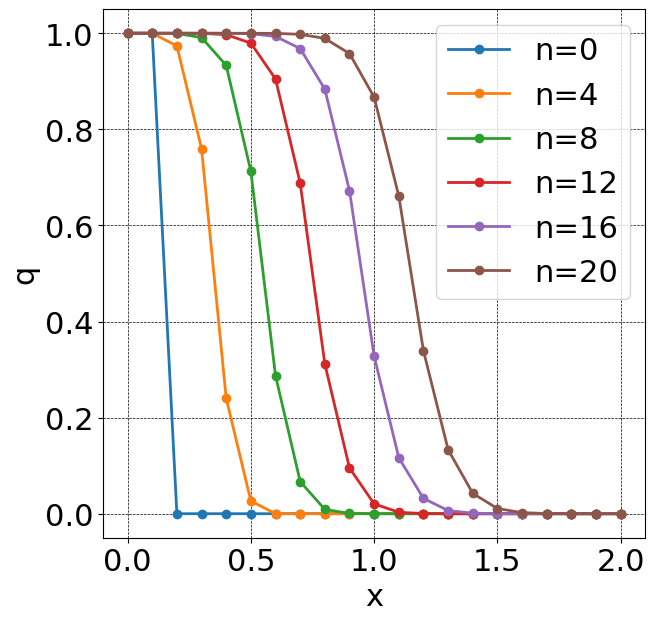

In [38]:
do_computing2(x, q, c, dt, dx, nmax, TVD, interval=4)

In [39]:
c = -1
dx = 0.1
dt = 0.05

jmax = 21
nmax = 10

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

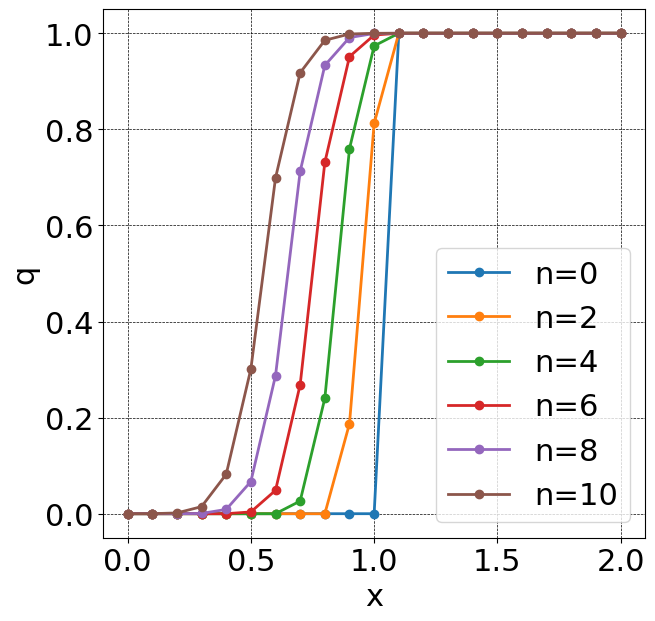

In [40]:
do_computing2(x, q, c, dt, dx, nmax, TVD, interval=2)